C:\Users\alex0\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


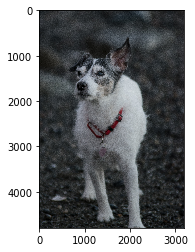

(4795, 3197, 3)


In [59]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

# Import the image
image = tf.image.decode_jpeg(tf.read_file("./images/DSC_0059.jpg"), channels=3)

session = tf.InteractiveSession()
plt.imshow(session.run(image))
plt.show()
print(session.run(image).shape)




In [60]:
img_shape = [4795, 3197]
img_h = 4795
img_w = 3197
height = img_h // 10
width = img_w // 10
vertical_margin = img_h // 100
horizontal_margin = img_w // 100
lim_top = img_h - img_h // vertical_margin - height  
lim_left = img_w - img_w // horizontal_margin - width


bbox = (vertical_margin, horizontal_margin, height, width)
print(bbox)

(47, 31, 479, 319)


In [61]:
mask = np.ones((img_h, img_w, 1), np.float32)
h = np.random.randint(32//2+1)
w = np.random.randint(32//2+1)
mask[bbox[0]+h:bbox[0]+bbox[2]-h,
     bbox[1]+w:bbox[1]+bbox[3]-w, :] = 0.
print(mask)
masked = image * mask
print(masked)

[[[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]]
Tensor("mul_4:0", shape=(4795, 3197, 3), dtype=uint8)


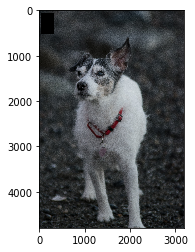

In [62]:
plt.imshow(session.run(masked))
plt.show()

In [63]:
output_image = tf.image.encode_jpeg(masked)

# Create a constant as filename
file_name = tf.constant('Output_image.jpeg')
file = tf.write_file(file_name, output_image)

#print(session.run(file))

print("Image Saved!")

session.close()

NameError: name 'masked_image' is not defined